https://www.aprendemachinelearning.com/analisis-exploratorio-de-datos-pandas-python/

 # Eejmplo de Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
from sklearn.covariance import EllipticEnvelope

Vamos a leer un csv directamente desde una URL de GitHub que contiene 
*información geográfica básica de los países del mundo*
y vamos a jugar un poco con esos datos.

In [2]:
#Carga de archivo csv desde una URL
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=";") #index_col=0
print(df.head(5))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

### Conocer información básica

In [3]:
#dimensiones
#Nombre de columnas
print('Cantidad de Filas y columnas: \n ',df.shape)
print('Nombre columnas: \n ',df.columns)

Cantidad de Filas y columnas: 
  (252, 19)
Nombre columnas: 
  Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


*df.info()*
Print a concise summary of a DataFrame.
This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage

In [4]:
#Columnas, nulos y tipo de datos
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

RangeIndex: 252 entries, 0 to 251 --> 252 filas
Data columns (total 19 columns) --> 19 columnas
- area es 'float'
- geoname_id, numeric  y population son 'int'
- el resto es 'object'
Podemos observar también el nº de valores no nulos de cada feature/característica (las columnas), de lo que intuimos el nº de valores nulos en cada una de ellas

In [5]:
#descripción estadística de los datos numérico
df.describe() #solo lo hará de los datos numéricos, lógico
#cantidad, media, desvío estándar, valores máximo y mínimo, cuartiles
df.columns

Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')

### Matriz de Correlación

In [6]:
#nos creamos un nuevo df solo con los valores numéricos
#eliminar las columnas constantes, variables "dummy", variables como "meses" (que a pesar de ser numéricas, no tiene lógica hayar su correlación)
df2 = df.drop(['alpha_2','alpha_3','capital','continent','currency_code','currency_name','eqivalent_fips_code','fips','languages','name','neighbours','phone','postal_code_format','postal_code_regex','tld'],axis = 1)
print(df2.head())
#eliminamos los datos faltantes de df2
df2.dropna(inplace = True, subset = ["area","geoname_id","numeric","population"])
print(df2.head())
#mostramos la matriz de correlaciones
#np.corrcoef(df2["area"],df2["geoname_id"],df2["numeric"],df2["population"])
df2.corr()
corr = round(df.corr(),3)
corr.style.background_gradient()

       area  geoname_id  numeric  population
0     468.0     3041565       20       84000
1   82880.0      290557      784     4975593
2  647500.0     1149361        4    29121286
3     443.0     3576396       28       86754
4     102.0     3573511      660       13254
       area  geoname_id  numeric  population
0     468.0     3041565       20       84000
1   82880.0      290557      784     4975593
2  647500.0     1149361        4    29121286
3     443.0     3576396       28       86754
4     102.0     3573511      660       13254


,area,geoname_id,numeric,population
area,1.000000,0.120000,-0.089000,0.413000
geoname_id,0.120000,1.000000,0.039000,-0.066000
numeric,-0.089000,0.039000,1.000000,-0.041000
population,0.413000,-0.066000,-0.041000,1.000000


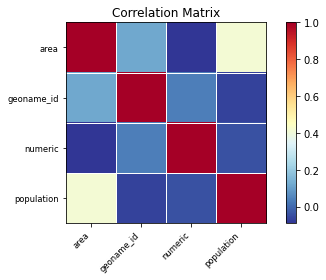

In [7]:
#correlación entre datos
corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

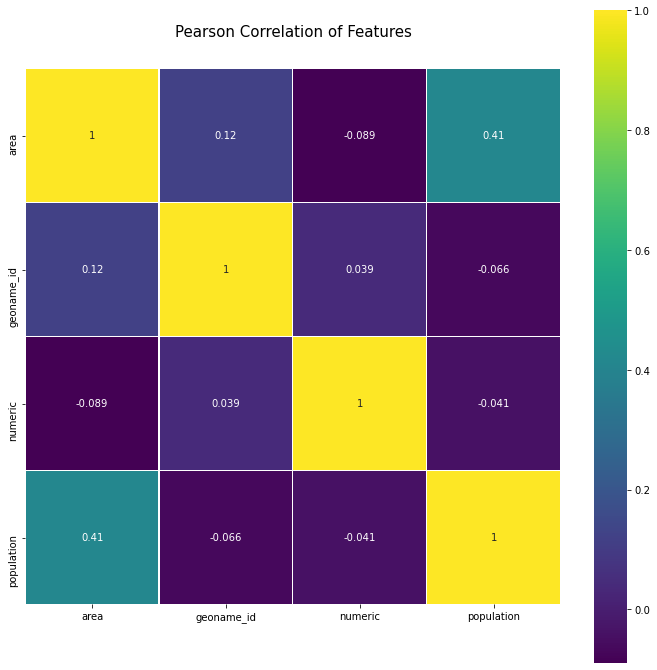

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df2.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

En este caso vemos baja correlación entre las variables. 
Dependiendo del algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación

### Cargar una segunda fuente de datos
Cargamos un segundo archivo csv para ahondar en el crecimiento de la población en los últimos años, 
filtramos a España y visualizamos

In [9]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pop = pd.read_csv(url)
print(df_pop.head())

#filtramos a españa
df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
df_pop_es

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460


,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000
1422,Spain,1982,37983310
1423,Spain,1987,38880702
1424,Spain,1992,39549438
1425,Spain,1997,39855442


In [10]:
df_pop_es.shape

(12, 3)

In [11]:
12*5+1952

2012

In [12]:
df_pop_es.max()

country          Spain
year              2007
population    40448191
dtype: object

In [13]:
df_pop_es.min()

country          Spain
year              1952
population    28549870
dtype: object

In [14]:
df_pop_es.describe()

,year,population
count,12.000000,1.200000e+01
mean,1979.500000,3.585180e+07
std,18.027756,4.323928e+06
min,1952.000000,2.854987e+07
25%,1965.750000,3.242722e+07
50%,1979.500000,3.721116e+07
75%,1993.250000,3.962594e+07
max,2007.000000,4.044819e+07


#### Visualicemos datos

<AxesSubplot:>

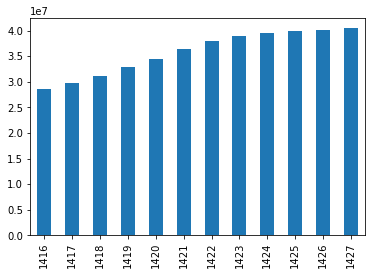

In [15]:
#le quitamos la columna de 'country', filtramos por 'poblacion'
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

Crecimiento de la Población de España. El eje x no está establecido y aparece un id de fila.

#### Comparativa entre 3 países

Hagamos la comparativa con otro país, por ejemplo con el crecimiento poblacional en Argentina e Italia

In [16]:
#vemos todos los países que hay
#ver los valores únicos de una columna
df_pop["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [17]:
df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]
df_pop_ar.head()

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799


In [18]:
df_pop_it = df_pop[(df_pop["country"] == 'Italy')]
df_pop_it.head()

,country,year,population
768,Italy,1952,47666000
769,Italy,1957,49182000
770,Italy,1962,50843200
771,Italy,1967,52667100
772,Italy,1972,54365564


<AxesSubplot:>

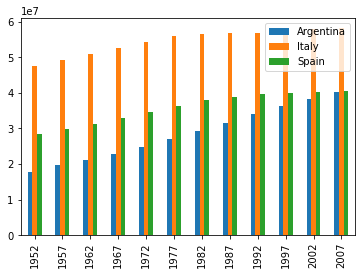

In [19]:
anios = df_pop_es['year'].unique()
#creamos variables para almacenar los valores de 'population' de los 3 paises
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values
pop_it = df_pop_it['population'].values
#creamos un DataFrame con lo anterior
df_plot = pd.DataFrame({'Argentina': pop_ar,
                        'Italy': pop_it,
                        'Spain': pop_es
                        }, 
                       index=anios)
df_plot.plot(kind='bar')

Gráfica comparativa de crecimiento poblacional entre España, Argentina e Italia, entre los años 1952 al 2007

#### Ahora filtremos todos los paises hispano-hablantes
Del 1er DataFrame, hay una columna que es de 'languages', en la que los países hispanohablantes tendrán en común 'es'

In [20]:
#miramos todos os idiomas que se hablan en los países para encontrar el filtro que queremos
df['languages'].unique()

array(['ca', 'ar-AE,fa,en,hi,ur', 'fa-AF,ps,uz-AF,tk', 'en-AG', 'en-AI',
       'sq,el', 'hy', 'pt-AO', nan, 'es-AR,en,it,de,fr,gn', 'en-AS,sm,to',
       'de-AT,hr,hu,sl', 'en-AU', 'nl-AW,es,en', 'sv-AX', 'az,ru,hy',
       'bs,hr-BA,sr-BA', 'en-BB', 'bn-BD,en', 'nl-BE,fr-BE,de-BE',
       'fr-BF', 'bg,tr-BG,rom', 'ar-BH,en,fa,ur', 'fr-BI,rn', 'fr-BJ',
       'fr', 'en-BM,pt', 'ms-BN,en-BN', 'es-BO,qu,ay', 'nl,pap,en',
       'pt-BR,es,en,fr', 'en-BS', 'dz', 'en-BW,tn-BW', 'be,ru',
       'en-BZ,es', 'en-CA,fr-CA,iu', 'ms-CC,en', 'fr-CD,ln,kg',
       'fr-CF,sg,ln,kg', 'fr-CG,kg,ln-CG', 'de-CH,fr-CH,it-CH,rm',
       'fr-CI', 'en-CK,mi', 'es-CL', 'en-CM,fr-CM',
       'zh-CN,yue,wuu,dta,ug,za', 'es-CO', 'es-CR,en', 'es-CU', 'pt-CV',
       'nl,pap', 'en,zh,ms-CC', 'el-CY,tr-CY,en', 'cs,sk', 'de',
       'fr-DJ,ar,so-DJ,aa', 'da-DK,en,fo,de-DK', 'en-DM', 'es-DO',
       'ar-DZ', 'es-EC', 'et,ru', 'ar-EG,en,fr', 'ar,mey',
       'aa-ER,ar,tig,kun,ti-ER', 'es-ES,ca,gl,eu,oc',
       'am,

In [21]:
df['name'].unique()

array(['Andorra', 'United Arab Emirates', 'Afghanistan',
       'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Angola',
       'Antarctica', 'Argentina', 'American Samoa', 'Austria',
       'Australia', 'Aruba', 'Aland Islands', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin',
       'Saint Barthelemy', 'Bermuda', 'Brunei', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba ', 'Brazil', 'Bahamas',
       'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize',
       'Canada', 'Cocos Islands', 'Democratic Republic of the Congo',
       'Central African Republic', 'Republic of the Congo', 'Switzerland',
       'Ivory Coast', 'Cook Islands', 'Chile', 'Cameroon', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Curacao',
       'Christmas Island', 'Cyprus', 'Czechia', 'Germany', 'Djibouti',
       'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecua

In [22]:
#lenguas habladas en España
df[df['name'] == 'Spain']['languages']

67    es-ES,ca,gl,eu,oc
Name: languages, dtype: object

In [23]:
#DataFrame con todos los paises hispanohablantes
df_espanol = df.replace(np.nan, '', regex=True) #donde no haya ningún valor/np.nan, lo reemplazamos con ""
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
df_espanol["name"].count()

29

hay 29 paises, son:

In [24]:
#nombre de dichos paises
df_espanol["name"].unique()

array(['Argentina', 'Aruba', 'Bolivia', 'Brazil', 'Belize', 'Chile',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
       'Spain', 'Gibraltar', 'Equatorial Guinea', 'Guatemala', 'Honduras',
       'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Puerto Rico', 'Paraguay',
       'Qatar', 'El Salvador', 'Trinidad and Tobago', 'United States',
       'Uruguay', 'Venezuela', 'Netherlands Antilles'], dtype=object)

### Visualicemos por población y área del país

<AxesSubplot:xlabel='alpha_3'>

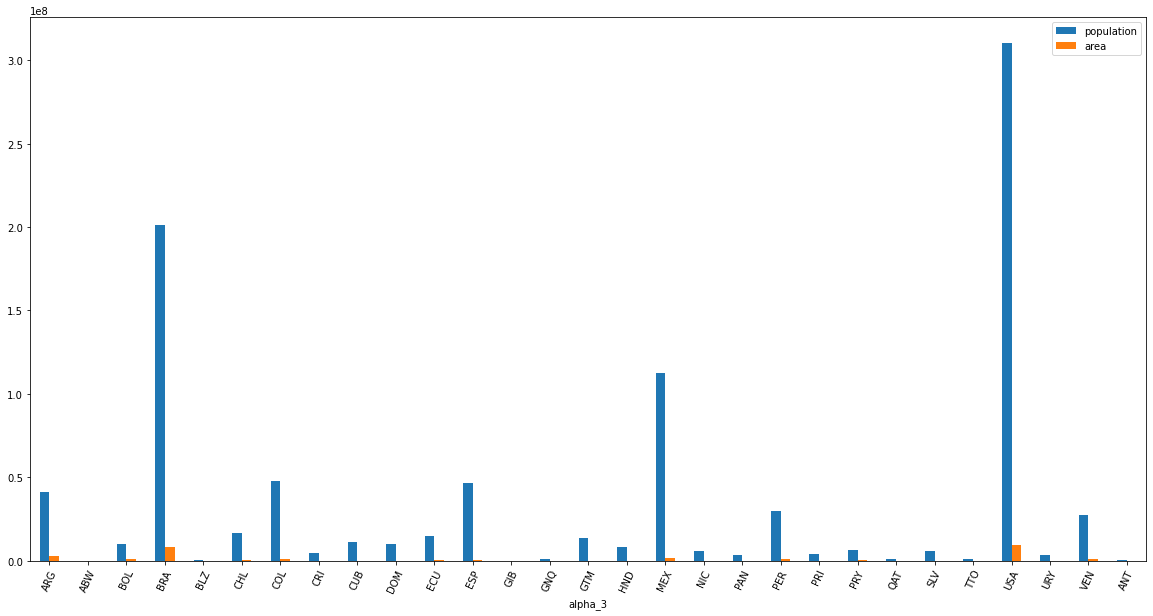

In [25]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

#### detección de Outliers
en este caso definimos como limite superior (e inferior) la media más (menos) “2 veces la desviación estándar” que muchas veces es tomada como máximos de tolerancia.

In [26]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_espanol.set_index('alpha_3')[['population']])

-102872707.87855022
167589161.25786057


['BRA', 'USA']

OTRA FORMA:

In [27]:
#eliminamos los datos faltantes
df_espanol = df_espanol.dropna()
df_espanol.shape

#de todo el DataFrame, seleccionamos los valores que queremos:
df_espanol = df_espanol.set_index('alpha_3')[['population']]
df_espanol

,population
alpha_3,
ARG,41343201
ABW,71566
BOL,9947418
BRA,201103330
BLZ,314522
CHL,16746491
COL,47790000
CRI,4516220
CUB,11423000


In [28]:
#cuartiles
Q1 = np.percentile(df_espanol,25)
Q2 = np.percentile(df_espanol,50) #mediana
Q3 = np.percentile(df_espanol,75)
rangointer = Q3-Q1

#criterio clásico de definición de outliers: definir los umbrales
umbralsuperior = Q3 + 1.5*rangointer
umbralinferior = Q1 - 1.5*rangointer
print(umbralsuperior)
print(umbralinferior)

62942056.0
-32308152.0


Cualquier valor que esté por encima o por debajo del umbralsuperior / umbralinferior, será un "outlier"

Si queremos comprobar cuántos casos hay por debajo o por encima de estos umbrales, 
vamos a usar esta función np.mean() y vamos a ver:

In [29]:
print(np.mean(df_espanol > umbralsuperior))
print(np.mean(df_espanol < umbralinferior))

population    0.103448
dtype: float64
population    0.0
dtype: float64


In [30]:
por encima nos da que el '10' de los casos están por encima. 
Si comprobamos los que están por debajo, vemos que es el 0
¿Qué estamos viendo aquí
Que estas medidas no son simétricas, es decir, nos da un umbral, un "threshold" que parte nuestros datos, pero no nos asegura que estén igualmente distribuidos por encima o por debajo. 

SyntaxError: invalid syntax (<ipython-input-30-bdddb252fdcc>, line 1)

In [31]:
#crear un modelo que nos va a seleccionar el 1 % de datos que considere que están muy alejados de nuestros datos más centrados. 
#from sklearn.covariance import EllipticEnvelope
outliers = EllipticEnvelope(contamination = 0.01)
#df_espanol

In [32]:
#PARA VARIAS VARIABLES

#definiríamos las variables que nos interesan de nuestra base de datos
var_list = ["population"] #aquí pondríamos las variables en las que quisiésemos detectar los outliers (deben de ser numéricas)
espanol = np.array(df_espanol.loc[:,var_list].dropna())
espanol #array

#entrenamos nuestro modelo
outliers.fit(espanol)

#pedirle que nos prediga con este modelo qué valores forman parte de este 1 % que queremos detectar
pred = outliers.predict(espanol)
pred #array de 1 y -1 --> interesan los -1

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1])

In [33]:
indices_outliers = np.where(pred==-1)
indices_outliers

(array([25], dtype=int64),)

In [34]:
espanol[indices_outliers]

array([[310232863]], dtype=int64)

In [35]:
df_espanol[df_espanol["population"] == 310232863]

,population
alpha_3,
USA,310232863


Detectamos como outliers a Brasil y a USA. Los eliminamos y graficamos ordenado por población de menor a mayor

<AxesSubplot:xlabel='alpha_3'>

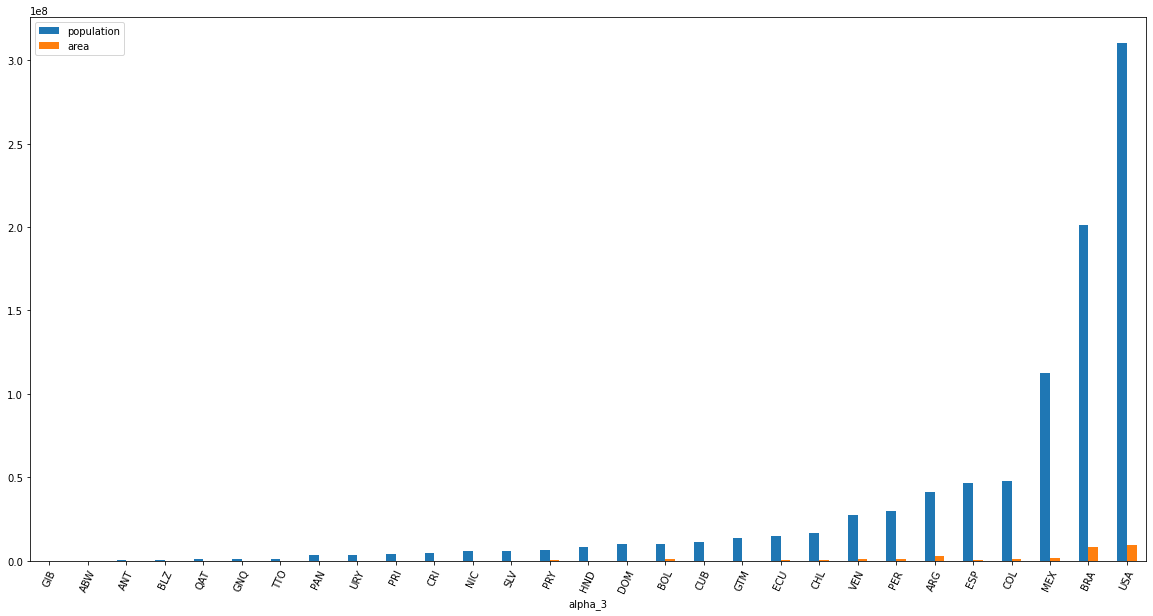

In [37]:
df_espanol = df.replace(np.nan, '', regex=True) #donde no haya ningún valor/np.nan, lo reemplazamos con ""
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
#gráfica con outliers

df_espanol.sort_values(["population"], inplace = True)
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

In [38]:
df_espanol = df.replace(np.nan, '', regex=True) #donde no haya ningún valor/np.nan, lo reemplazamos con ""
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
# Quitemos BRA y USA por ser outlies y volvamos a graficar:
df_espanol.shape #(29, 19)
df_espanol.drop([30,233], inplace=True)
df_espanol.shape #(27, 19)

(27, 19)

<AxesSubplot:xlabel='alpha_3'>

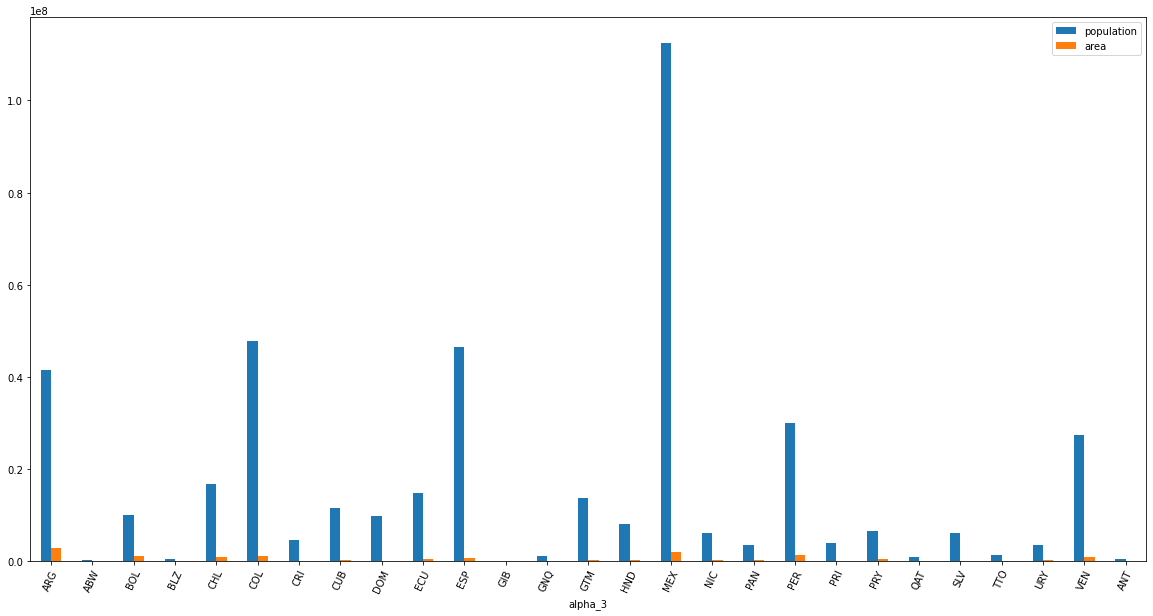

In [39]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

#### Graficamos ordenando por tamaño Población

<AxesSubplot:xlabel='alpha_3'>

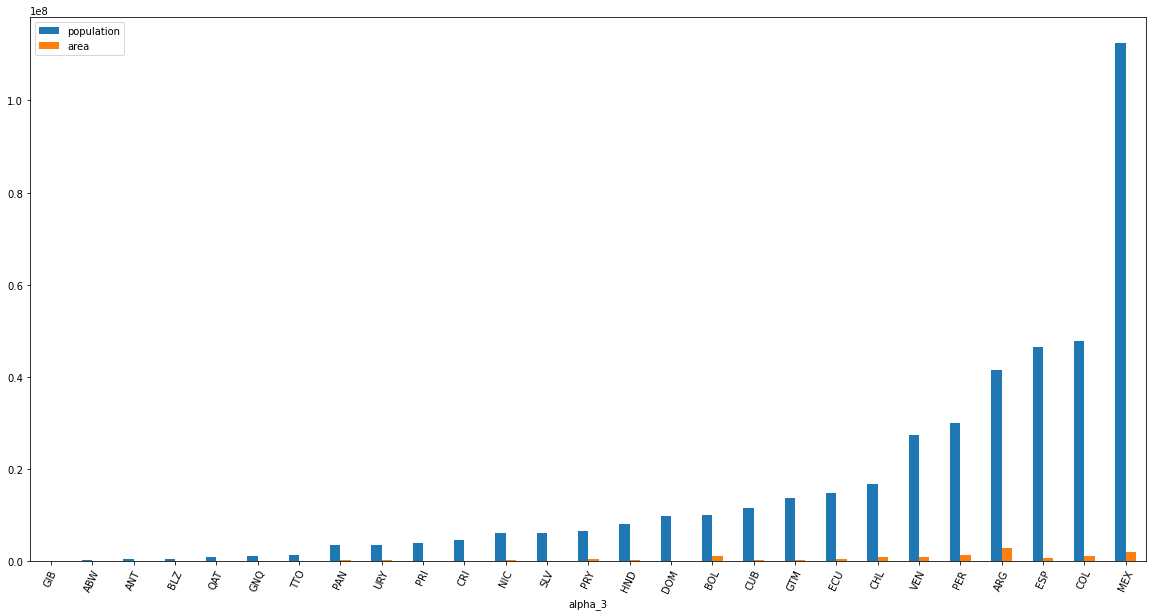

In [40]:
#df_espanol.set_index('alpha_3')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10))
df_espanol.sort_values(["population"], inplace = True)
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

Así queda nuestra gráfica sin outliers

hemos podido responder: 
- cuántos datos tenemos, 
- si hay nulos, 
- los tipos de datos (entero, float, string), 
- la correlación, 
- hicimos visualizaciones, 
- comparativas, 
- manipulación de datos, 
- detección de ouliers 
- y volver a graficar.

#### Visualización por Área y población

<AxesSubplot:xlabel='alpha_3'>

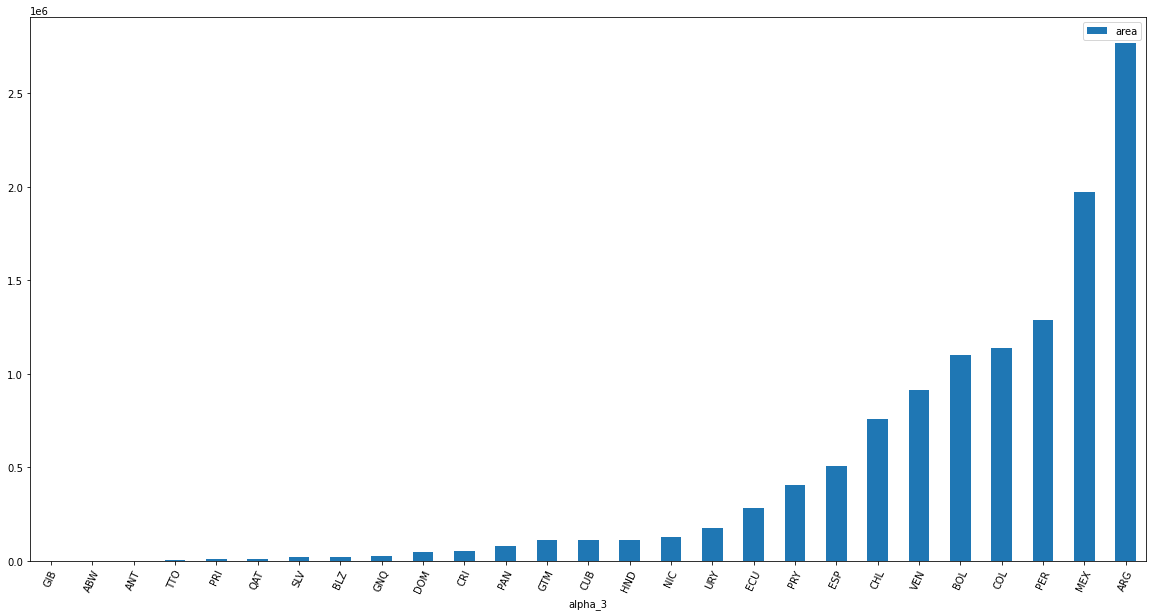

In [43]:
df_espanol.set_index('alpha_3')[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

<AxesSubplot:xlabel='alpha_3'>

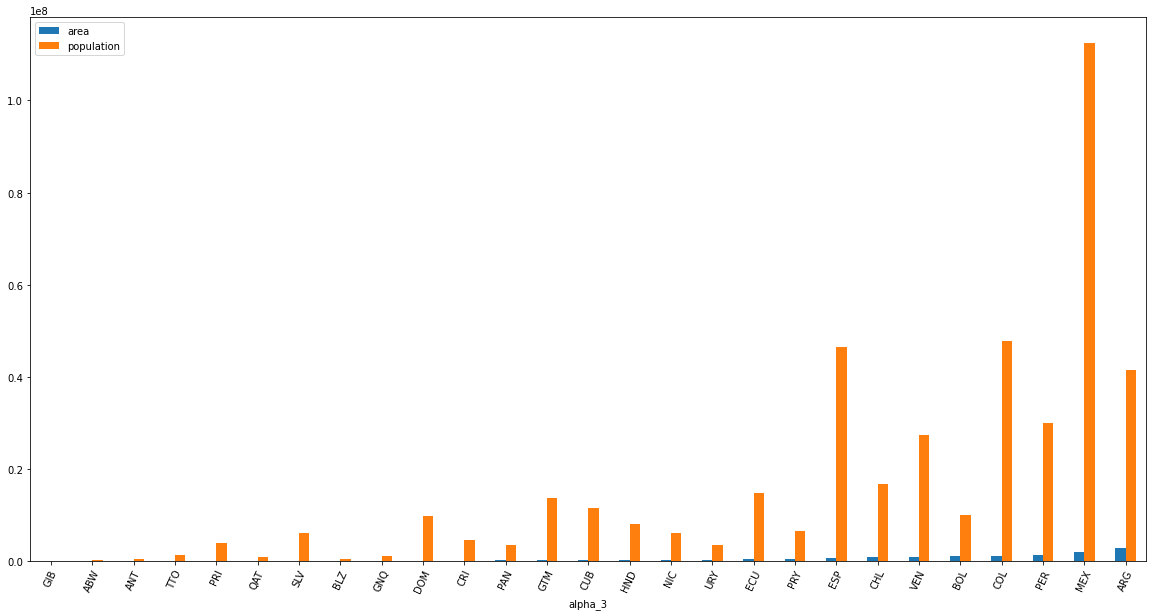

In [42]:
df_espanol.set_index('alpha_3')[['area','population']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

In [44]:
# En este caso, podriamos quitar por "lo bajo", area menor a 110.000 km2:
df_2 = df_espanol.set_index('alpha_3')
df_2 = df_2[df_2['area'] > 110000]
df_2

,alpha_2,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
alpha_3,,,,,,,,,,,,,,,,,,
URY,UY,176220.0,Montevideo,SA,UYU,Peso,,UY,3439705,es-UY,Uruguay,"BR,AR",858,598,3477000,#####,^(\d{5})$,.uy
NIC,NI,129494.0,Managua,,NIO,Cordoba,,NU,3617476,"es-NI,en",Nicaragua,"CR,HN",558,505,5995928,###-###-#,^(\d{7})$,.ni
PRY,PY,406750.0,Asuncion,SA,PYG,Guarani,,PA,3437598,"es-PY,gn",Paraguay,"BO,BR,AR",600,595,6375830,####,^(\d{4})$,.py
HND,HN,112090.0,Tegucigalpa,,HNL,Lempira,,HO,3608932,es-HN,Honduras,"GT,NI,SV",340,504,7989415,@@####,^([A-Z]{2}\d{4})$,.hn
BOL,BO,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
CUB,CU,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
ECU,EC,283560.0,Quito,SA,USD,Dollar,,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
CHL,CL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
VEN,VE,912050.0,Caracas,SA,VEF,Bolivar,,VE,3625428,es-VE,Venezuela,"GY,BR,CO",862,58,27223228,####,^(\d{4})$,.ve


<AxesSubplot:xlabel='alpha_3'>

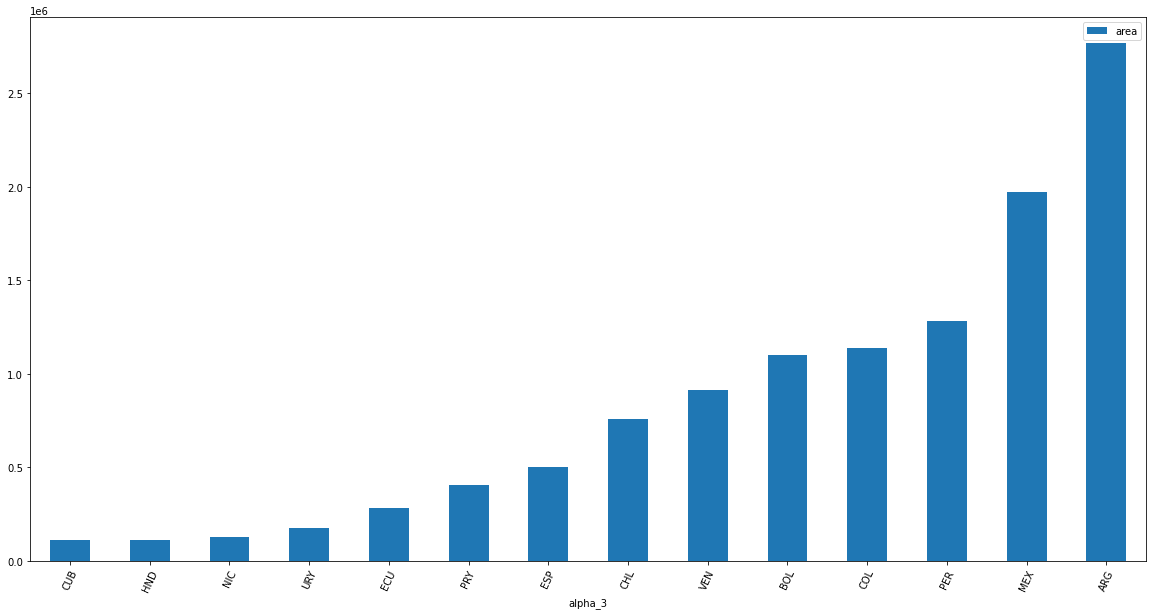

In [45]:
df_2[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

# Otras pruebas y gráficas que se suelen hacer son:

- Si hay datos categóricos, agruparlos, contabilizarlos y ver su relación con las clases de salida
- gráficas de distribución en el tiempo, por ejemplo si tuviéramos ventas, para tener una primera impresión sobre su estacionalidad.
- Rankings del tipo “10 productos más vendidos” ó “10 ítems con más referencias por usuario”.
- Calcular importancia de Features y descartar las menos útiles.